# SpacePy
###Hackaton2
Описание кейса:
Предлагается попробовать применить машинное обучение для решения задачи информационной безопасности: обнаружение атак на киберфизические системы. Это системы для решения критически важных задач, которые состоят из физических компонентов и цифровых алгоритмов. 

Кейс подготовлен Сингапурским университетом c помощью стенда для безопасной очистки воды (Secure Water Treatment, SWaT), которая является уменьшенным вариантом реального завода. Стенд работал 11 дней, из которых 7 дней прошло в нормальном режиме (без атак и сбоев), а в оставшиеся дни проводились атаки двух типов:
Кибератаки через компьютерную сеть стенда.
Физические атаки, связанные с выводом из строя компонентов стенда (например, двигатель или насос).
Набор данных включает как состояние оборудования и характеристики очищаемой воды, так и сетевой трафик. Атаки в обучающем наборе данных размечены вручную. С помощью размеченных данных вам нужно научиться определять атаки для тестового набора данных.
Данные конвертированные в .csv скачиваются из https://www.dropbox.com/s/bw7vcwdse226vr4/data.csv 
Репозиторий по данной ссылке на [Github](https://github.com/Amex090/SpacePy/blob/main/Hackaton2v2.ipynb/ "Version2")

##1.Решение задачи классификации (выявления атак) с помощью  модели ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle

*Импортируем датасет преобразованный в.csv*

In [3]:
!wget https://www.dropbox.com/s/bw7vcwdse226vr4/data.csv

--2022-05-20 00:04:56--  https://www.dropbox.com/s/bw7vcwdse226vr4/data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/bw7vcwdse226vr4/data.csv [following]
--2022-05-20 00:04:56--  https://www.dropbox.com/s/raw/bw7vcwdse226vr4/data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2ad1a08797061e208f4e2a7223.dl.dropboxusercontent.com/cd/0/inline/Bln6jXP7SGrZjxbxXRzxoEwdth1lG6zWzQZvQexsPUFG1V6BXQs8dO6eVkPdjDc89tAErA8Z2ECQ2k2c-MiuyRSvDjG6RN1bBf1-5QrFQde31RYEvnKXqv0aPmiiZ8MsVtNFTPyDIUd8oTeE4c2NxBoxjHCMy6xHVwrqQAfGZfFRCg/file# [following]
--2022-05-20 00:04:56--  https://uc2ad1a08797061e208f4e2a7223.dl.dropboxusercontent.com/cd/0/inline/Bln6jXP7SGrZjxbxXRzxoEwdth1lG6zWzQZvQexsPUFG1V6BXQs8dO6eVkPdjDc89tAErA8Z2ECQ2k2c

In [4]:
df = pd.read_csv('data.csv',sep=';', low_memory=False)

In [5]:
#удаляем лишние пробелы из названия колонок

df.columns = df.columns.str.replace(' ', '')

ОПРЕДЕЛЯЕМ ОСНОВНЫЕ ДАТЧИКИ, КОТОРЫЕ ПОДВЕРГАЮТСЯ АТАКАМ
1.   *Загружаем файл со списком атак:



In [6]:
!wget https://www.dropbox.com/s/ric1yxd389ypv67/List_of_attacks_Final.xlsx

--2022-05-20 00:05:04--  https://www.dropbox.com/s/ric1yxd389ypv67/List_of_attacks_Final.xlsx
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ric1yxd389ypv67/List_of_attacks_Final.xlsx [following]
--2022-05-20 00:05:05--  https://www.dropbox.com/s/raw/ric1yxd389ypv67/List_of_attacks_Final.xlsx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce98615b2654b69ea89b1ea93aa.dl.dropboxusercontent.com/cd/0/inline/Bll4YTDrNqGBohyEJoWbdzw15x5dUoL66R1isO6pcqRhZh4xrGpL0NRdOcdXco0vB2w5K_5io075JxkQxuaLY8Jfzu-blSJVCX1QECMlIq0_JBVNAr_Q909jqlHvRu8RHT8lRjkxDYREs14NkEIxtvJ9vfQ0l9a57dlYN5Lh_Md9lg/file# [following]
--2022-05-20 00:05:05--  https://uce98615b2654b69ea89b1ea93aa.dl.dropboxusercontent.com/cd/0/inline/Bll4YTDrNqGBohyEJoWbdzw15x

In [7]:
df2 = pd.read_excel('List_of_attacks_Final.xlsx')
df2 = df2.drop(df2[df2['Attack Point'].isna() == True].index)

In [8]:
#Удаляем строки No Physical Impact Attack

df2 = df2.drop(df2[df2['Attack Point'] == 'No Physical Impact Attack'].index)

In [9]:
#Получаем список уникальных значений из колонки Attack Point

print("количество датчиков, которые подвергаются атакам", len(df2['Attack Point'].unique()))
print()
print("Список датчиков")
print(df2['Attack Point'].unique())

количество датчиков, которые подвергаются атакам 28

Список датчиков
['MV-101' 'P-102' 'LIT-101' 'MV-504' 'AIT-202' 'LIT-301' 'DPIT-301'
 'FIT-401' 'MV-304' 'Mv-303' 'MV-303' 'AIT-504' 'MV-101, LIT-101'
 'UV-401, AIT-502, P-501' 'P-602, DIT-301, MV-302' 'P-203, P-205'
 'LIT-401, P-401' 'P-101, LIT-301' 'P-302, LIT-401' 'P-302'
 'P-201, P-203, P-205' 'LIT-101, P-101, MV-201' 'LIT-401' 'P-101'
 'P-101; P-102' 'P-501, FIT-502' 'AIT-402, AIT-502' 'FIT-401, AIT-502']


*Совмещаем значения по пробелу и добавляем в новый чистый список:*

In [10]:

features = []

for col in df2['Attack Point'].unique():
    features += col.split(', ')

#уберем символ "-" из названия фичей и сделаем все буквы заглавными

for i in range(len(features)):
    features[i] = features[i].replace('-', "")
    features[i] = features[i].upper()
    
features = list(set(features))

In [11]:
#удалим фичи которых нет в тренировочном наборе данных

for i in features:
    if i not in df.columns:
        features.remove(i)

In [12]:
#создадим новый датафрейм в котором будут только фичи из списка features

df_new = pd.DataFrame()

for colname in features:
    df_new[colname] = df[colname].copy()

In [13]:
#Добавим к датасету целевую переменную, чтобы в случае удаления лишних строк, длины тренировочного набора и серия с меткой совпали

df_new['Normal/Attack'] = df['Normal/Attack'].copy()
df_new.head(5)

,MV101,MV304,FIT502,DPIT301,P101,MV302,P501,MV303,P302,P401,...,LIT301,AIT504,AIT202,AIT502,P602,LIT101,P102,LIT401,P205,Normal/Attack
0,2,1,"1,279621","19,74838",2,2,2,1,2,1,...,"956,1651","12,03538","8,396437","145,1166",1,"522,8467",1,"942,0662",2,Normal
1,2,1,"1,297554","19,74838",2,2,2,1,2,1,...,"956,1651","12,03538","8,396437","145,1166",1,"522,886",1,"942,0277",2,Normal
2,2,1,"1,293967","19,69076",2,2,2,1,2,1,...,"956,4855","12,03538","8,394514","145,1166",1,"522,8467",1,"941,8739",2,Normal
3,2,1,"1,281158","19,69076",2,2,2,1,2,1,...,"956,806","12,03538","8,394514","145,0141",1,"522,9645",1,"941,797",2,Normal
4,2,1,"1,281158","19,69076",2,2,2,1,2,1,...,"957,0864","12,03538","8,394514","144,8859",1,"523,4748",1,"942,22",2,Normal


In [14]:
df_new.columns

Index(['MV101', 'MV304', 'FIT502', 'DPIT301', 'P101', 'MV302', 'P501', 'MV303',
       'P302', 'P401', 'MV201', 'UV401', 'P203', 'P201', 'AIT402', 'FIT401',
       'LIT301', 'AIT504', 'AIT202', 'AIT502', 'P602', 'LIT101', 'P102',
       'LIT401', 'P205', 'Normal/Attack'],
      dtype='object')

In [15]:
#Убираем лишние пробелы из значений целевой переменной

df_new['Normal/Attack'] = df_new['Normal/Attack'].str.replace(' ', "")

In [16]:
unique_values = []

for column in df_new.columns:
    if len(df_new[column].unique()) < 2:
        df_new = df_new.drop(column, axis=1)

In [17]:
num_cols = []

for columns in df_new.columns:
    if len(df_new[columns].unique())> 3:
        num_cols += [columns]

In [18]:
for num_col in num_cols:
    df_new[num_col] = df_new[num_col].str.replace(',', '.').astype('float')

In [19]:
df_new.isna().sum()

MV101            0
MV304            0
FIT502           0
DPIT301          0
P101             0
MV302            0
P501             0
MV303            0
P302             0
MV201            0
UV401            0
P203             0
P201             0
AIT402           0
FIT401           0
LIT301           0
AIT504           0
AIT202           0
AIT502           0
P602             0
LIT101           0
P102             0
LIT401           0
P205             0
Normal/Attack    0
dtype: int64

In [20]:
#Построив сводную таблицу, мы видим, что в случае когда FIT401 = 0, в подавляющм числе случаев это признак атаки

pd.pivot_table(df_new[df_new.FIT401 == 0], values='FIT401',
                    columns=['Normal/Attack'], aggfunc='count')

Normal/Attack,Attack,Normal
FIT401,32758,104


In [21]:
#А в случаях, когда FIT401 больше 0, в большинстве своем наблюдения имеют метку Normal

pd.pivot_table(df_new[df_new.FIT401 > 0], values='FIT401',
                    columns=['Normal/Attack'], aggfunc='count')

Normal/Attack,Attack,Normal
FIT401,21863,395194


In [22]:
#посчитаем сколько строк с меткой Normal и Attack

print(len(df_new[df_new['Normal/Attack'] == 'Attack']))
print(len(df_new[df_new['Normal/Attack'] == 'Normal']))

54621
395298


In [23]:
#Заменим в нашей целевой переменной метки Normal = 0, Attack = 1

df_new['Normal/Attack'] = df_new['Normal/Attack'].replace('Normal', 0)
df_new['Normal/Attack'] = df_new['Normal/Attack'].replace('Attack', 1)

*Построим карту корреляции признаков (heatmap):*

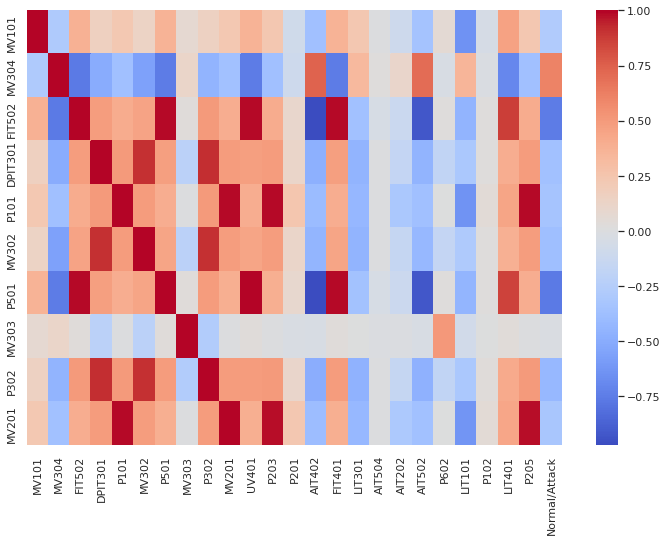

In [24]:
correlation = df_new.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(correlation.head(10), annot = False, cmap = 'coolwarm')

In [25]:
X = df_new.drop('Normal/Attack', axis=1).copy()
y = df_new['Normal/Attack'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

X_train = X_train.copy()
X_test = X_test.copy()
y_train = y_train.copy()
y_test = y_test.copy()

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled  = scaler.transform(X_test)

X_train.iloc[:] = X_train_scaled
X_test.iloc[:] = X_test_scaled

In [26]:
#@title Логистическая Регрессия{ run: "auto" }
#@markdown ### Тип Регуляризации 
penalty= 'l1' #@param [ "l2" , "l1", "none"]{type:"string"}
#@markdown ### Константа Регуляризации
regularization = 1.66 #@param {type:"slider", min:0.01, max:3, step:0.05}



LogReg = LogisticRegression(fit_intercept=True,
                            penalty=penalty,solver='saga',
                            C=regularization,
                            max_iter=100000)

LogReg.fit(X_train, y_train)

LogisticRegression(C=1.66, max_iter=100000, penalty='l1', solver='saga')

*Код для сохранения обученной модели в RAW:*



In [28]:
filename = 'LR_model.sav'
pickle.dump(LogReg, open(filename, 'wb'))

In [39]:
#filename = 'saved_models/LR_model.sav'
#LogReg = pickle.load(open(filename, 'rb'))

In [29]:
y_predict=LogReg.predict(X_test)

print('Метрики регрессии: ')
print('ACC: %.4f' % acc(y_predict,y_test))
print('F1 : %.4f' %  f1(y_predict,y_test,average='binary'))

Метрики регрессии: 
ACC: 0.9632
F1 : 0.8269


*Матрицы ошибок : True Positive Rate (TPR) и False Positive Rate (FPR)*

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
#roc_curve(y_test, y_predict)
print("TPR: ", tpr)
print("FPR: ", fpr)

TPR:  [0.         0.71513836 1.        ]
FPR:  [0.         0.00202722 1.        ]


*Графики основных метрик модели на основе логистической регресии*
1.   График "Кривая" регрессии ROC

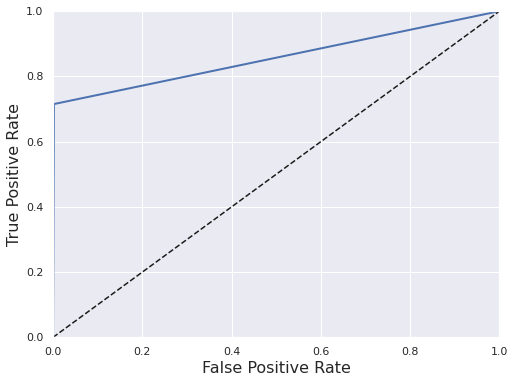

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()


2.   График корреляции между признаком атаки и остальными признаками



In [60]:
import warnings; warnings.simplefilter('ignore')
sns.pairplot(df, hue = 'attack')

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7ff506df2320> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7ff506dfa950> (for post_execute):


KeyboardInterrupt: ignored

*Метрика AUC (площадь под кривой ROC):*

In [33]:
print('AUC: %.4f' % roc_auc_score(y_test, y_predict))

AUC: 0.8566


####Иные метрики качества модели:

In [59]:
target_names = ['normal', 'attack']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.39      0.66      0.49       416
      attack       0.97      0.90      0.93      4584

    accuracy                           0.88      5000
   macro avg       0.68      0.78      0.71      5000
weighted avg       0.92      0.88      0.90      5000



##2.Построение ДЕРЕВА РЕШЕНИЙ с использованем GreatSearchCV

Создаем словарь с параметрами, которые будет перебирать GridSearchCV

In [35]:
parametrs = {
    'n_estimators': [2,5],
    'max_features': ['sqrt'],
    'max_depth': [x for x in range(3, 5, 1)],
    'min_samples_split': [15,25],
    'min_samples_leaf': [1,2,5]
}

grid_search_reg = GridSearchCV(RandomForestClassifier(), parametrs, scoring = 'accuracy', cv=5, n_jobs=-1)
grid_search_reg.fit(X_train, y_train)
grid_search_reg.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 2}

In [36]:
y_predict = grid_search_reg.best_estimator_.predict(X_test)

Качество модели на метрике accuracy

In [42]:
print('accuracy: %.4f' % acc(y_test, y_predict))

accuracy: 0.9632


####Иные метрики качества модели:

In [58]:
target_names = ['normal', 'attack']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.39      0.66      0.49       416
      attack       0.97      0.90      0.93      4584

    accuracy                           0.88      5000
   macro avg       0.68      0.78      0.71      5000
weighted avg       0.92      0.88      0.90      5000



##3.ПОСТРОЕНИЕ модели на основе метода опорных векторов SVM

Обращаем Ваше внимание, что SVM модель обучается относительно долго, поэтому был выбрана сокращенная обучающая выборка

In [44]:
C = 1.0  # = self._alpha in our algorithm

model1 = svm.SVC(kernel='linear', C=C)

model1.fit(X_train.iloc[:50000,:], y_train.iloc[:50000])
y_predict = model1.predict(X_test.iloc[:10000,:])

print(acc(y_test.iloc[:10000], y_predict))

0.9638


In [45]:
filename = 'SVC_SL_model.sav'
pickle.dump(model1, open(filename, 'wb'))

In [46]:
#filename = 'SVC_SL_model.sav' model1 = pickle.load(open(filename, 'rb'))

####Метрики качества модели:

In [57]:
target_names = ['normal', 'attack']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.39      0.66      0.49       416
      attack       0.97      0.90      0.93      4584

    accuracy                           0.88      5000
   macro avg       0.68      0.78      0.71      5000
weighted avg       0.92      0.88      0.90      5000



                 
#                                                                                              ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ.

##4.ПОСТРОЕНИЕ SVM ONE-CLASS MODEL (ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ)

In [49]:
df_new.head()

,MV101,MV304,FIT502,DPIT301,P101,MV302,P501,MV303,P302,MV201,...,LIT301,AIT504,AIT202,AIT502,P602,LIT101,P102,LIT401,P205,Normal/Attack
0,2,1,1.279621,19.74838,2,2,2,1,2,2,...,956.1651,12.03538,8.396437,145.1166,1,522.8467,1,942.0662,2,0
1,2,1,1.297554,19.74838,2,2,2,1,2,2,...,956.1651,12.03538,8.396437,145.1166,1,522.8860,1,942.0277,2,0
2,2,1,1.293967,19.69076,2,2,2,1,2,2,...,956.4855,12.03538,8.394514,145.1166,1,522.8467,1,941.8739,2,0
3,2,1,1.281158,19.69076,2,2,2,1,2,2,...,956.8060,12.03538,8.394514,145.0141,1,522.9645,1,941.7970,2,0
4,2,1,1.281158,19.69076,2,2,2,1,2,2,...,957.0864,12.03538,8.394514,144.8859,1,523.4748,1,942.2200,2,0


Исправим целевые метки на 1(normal) и на -1(attack)

In [50]:
df_new['Normal/Attack'] = df_new['Normal/Attack'].replace(1, -1)
df_new['Normal/Attack'] = df_new['Normal/Attack'].replace(0, 1)

Обучать будем на обрезанном датасете, чтобы снизить время обучения

In [51]:
X = df_new.iloc[:50000].drop('Normal/Attack', axis=1)
y = df_new['Normal/Attack'].iloc[:50000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

X_train = X_train.copy()
X_test = X_test.copy()
y_train = y_train.copy()
y_test = y_test.copy()

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled  = scaler.transform(X_test)

X_train.iloc[:] = X_train_scaled
X_test.iloc[:] = X_test_scaled

Доля выбросов относительно общего количества наблюдений

In [52]:
outliers = df_new['Normal/Attack'][df_new['Normal/Attack'] == -1]
print(len(outliers))
normal = df_new['Normal/Attack'][df_new['Normal/Attack'] == 1]
print(len(normal))
ratio = round(len(outliers) / len(normal),2)
print(ratio)

54621
395298
0.14


In [53]:
nu = ratio
print("nu", nu)

model = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.00005) 
model.fit(X_train)

nu 0.14


OneClassSVM(gamma=5e-05, nu=0.14)

####Метрики качества модели:

In [56]:
target_names = ['normal', 'attack']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.39      0.66      0.49       416
      attack       0.97      0.90      0.93      4584

    accuracy                           0.88      5000
   macro avg       0.68      0.78      0.71      5000
weighted avg       0.92      0.88      0.90      5000

